In [29]:
# Importing necessary libraries
from keras.preprocessing.image import ImageDataGenerator
# Building deep learning models
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image

import os
import numpy as np

In [30]:
dataset = 'C:/Users/drish/Downloads/Compressed/input/tomato'

In [31]:
batch_size = 32
img_height = 180
img_width = 180

In [32]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(
        'C:/Users/drish/Downloads/Compressed/input/tomato/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 50 images belonging to 10 classes.


In [34]:
test_generator = test_datagen.flow_from_directory(
        'C:/Users/drish/Downloads/Compressed/input/tomato/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 50 images belonging to 10 classes.


In [35]:
# First model

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

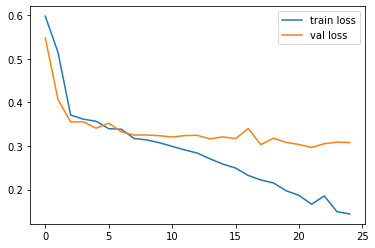

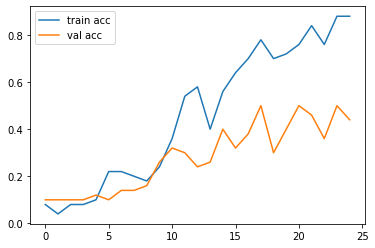

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# Testing the model
from keras.preprocessing import image
test = image.load_img("C:/Users/drish/Downloads/Compressed/input/tomato/train/Tomato___Bacterial_spot/33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

In [39]:
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:

# Second model

cnn2 = tf.keras.models.Sequential()

#Convolution layer 1
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn2.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn2.summary()

# Fit
temp = cnn2.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

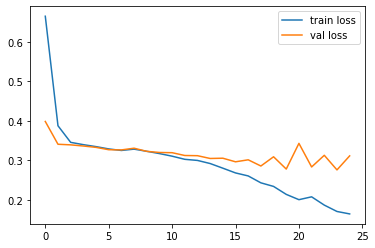

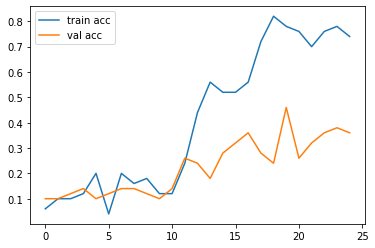

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [42]:
# Third model

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn3.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
temp = cnn3.fit(x = train_generator, validation_data=test_generator,epochs=25,batch_size = 64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

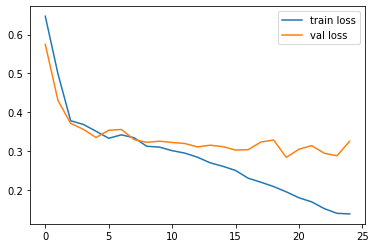

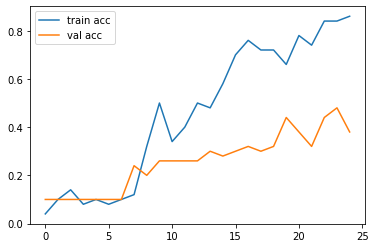

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')